# Microdados da Educação Superior - Docentes de todas as universidades do país

In [62]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np


df = pd.read_csv(
    'SUP_DOCENTE_2019.csv',
    encoding = "ISO-8859-1",
    sep = '|'
)

df.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_DOCENTE_IES,ID_DOCENTE,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,...,IN_ATUACAO_GRAD_PRESENCIAL,IN_ATUACAO_POS_EAD,IN_ATUACAO_POS_PRESENCIAL,IN_ATUACAO_SEQUENCIAL,IN_ATUACAO_PESQUISA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,IN_EXERCICIO_DATA_REFERENCIA,IN_VISITANTE,TP_VISITANTE_IFES_VINCULO
0,2019,1,1,1,1178692,EC5AA8E675AD29C50386820A3F3E9F97,1,5,1.0,2,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN
1,2019,1,1,1,1178691,DDA849C5C6275470F9175628F502218E,1,4,1.0,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
2,2019,1,1,1,1178693,2FF35722D03A9C6459FB5470F17F6709,1,3,1.0,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
3,2019,1,1,1,1180431,C5AB8500E4EC686BFFF71870108EA10A,1,5,1.0,2,...,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
4,2019,1,1,1,1178686,60FD7BF0222B1B16D19D9E4E08D4178A,1,5,1.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN


### **Quantidade da amostra**

## Professores x Professoras

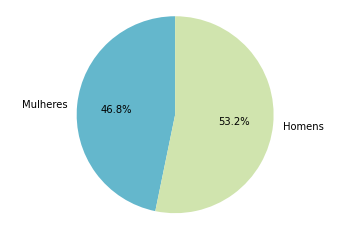

In [11]:
qt_mulheres = df.loc[df['TP_SEXO'] == 1].count()[0]
qt_homens = df.loc[df['TP_SEXO'] == 2].count()[0]

mulheres = df.loc[df['TP_SEXO'] == 1]
mulheres_negras = mulheres.loc[mulheres['TP_RACA_COR']]

labels = ['Mulheres', 'Homens']
values = [qt_mulheres, qt_homens]

fig, ax = plt.subplots() # Retorna Figures e Axes

ax.pie(values, labels = labels, colors=['#64B7CC', '#D0E4AE'], autopct='%1.1f%%', shadow=False, startangle=90)

ax.axis('equal')

plt.show()

### É possível observar que há uma quantidade maior de docentes do sexo masculino

## **Relação de docentes por raça e sexo**

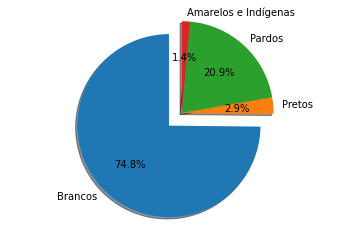

In [65]:
brancos = df.loc[df['TP_COR_RACA'] == 1].count()[0]
pretos = df.loc[df['TP_COR_RACA'] == 2].count()[0]
pardos = df.loc[df['TP_COR_RACA'] == 3].count()[0]
amarelos_indigenas = df.loc[df['TP_COR_RACA'] == (4 or 5)].count()[0]
no_info = df.loc[df['TP_COR_RACA'] == (9 or 0)].count()[0]
labels = ['Brancos', 'Pretos', 'Pardos', 'Amarelos e Indígenas']
values = [brancos, pretos, pardos, amarelos_indigenas]
myexplode = [0.2, 0, 0, 0]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, explode=myexplode)

ax1.axis('equal')

plt.show()

#### É possível observar que, entre os docentes, há uma grande predominância de pessoas brancas, o que é um indicativo de todo histórico desigual do país.

### Para uma visão mais aprofundada, vamos dividir essa relação por gênero.

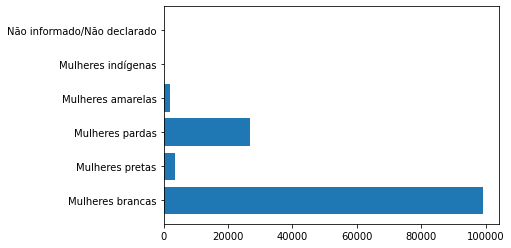

In [71]:
mulheres = df.loc[df['TP_SEXO'] == 1]

mulheres_B = mulheres.loc[mulheres['TP_COR_RACA'] == 1].count()[0] # Mulheres Brancas
mulheres_P = mulheres.loc[mulheres['TP_COR_RACA'] == 2].count()[0] # Mulheres Pretas
mulheres_Pa = mulheres.loc[mulheres['TP_COR_RACA'] == 3].count()[0] # Mulheres Pardas
mulheres_A = mulheres.loc[mulheres['TP_COR_RACA'] == 4].count()[0] # Mulheres Amarelas
mulheres_In = mulheres.loc[mulheres['TP_COR_RACA'] == 5].count()[0] # Mulheres Indígenas
mulheres_ND = mulheres.loc[mulheres['TP_COR_RACA'] == (9 or 0)].count()[0] # Mulheres que não declararam ou não há essa informação

x_axis = ['Mulheres brancas', 'Mulheres pretas', 'Mulheres pardas', 'Mulheres amarelas', 'Mulheres indígenas', 'Não informado/Não declarado']
y_axis = [mulheres_B, mulheres_P, mulheres_Pa, mulheres_A, mulheres_In, mulheres_ND]

plt.barh(x_axis, y_axis)
plt.show()

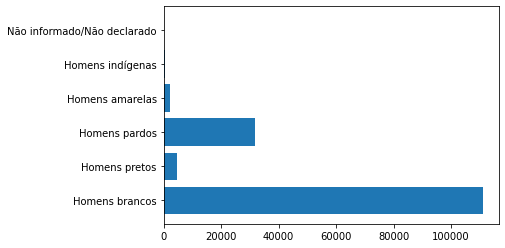

In [82]:
homens = df.loc[df['TP_SEXO'] == 2]

homens_B = homens.loc[homens['TP_COR_RACA'] == 1].count()[0] # Homens brancos
homens_P = homens.loc[homens['TP_COR_RACA'] == 2].count()[0] # Homens pretos
homens_Pa = homens.loc[homens['TP_COR_RACA'] == 3].count()[0] # Homens pardos
homens_A = homens.loc[homens['TP_COR_RACA'] == 4].count()[0] # Homens amarelos
homens_In = homens.loc[homens['TP_COR_RACA'] == 5].count()[0] # Homens Indígenas
homens_ND = homens.loc[homens['TP_COR_RACA'] == (9 or 0)].count()[0] # Homens que não declararam ou não há essa informação

x_axis = ['Homens brancos', 'Homens pretos', 'Homens pardos', 'Homens amarelas', 'Homens indígenas', 'Não informado/Não declarado']
y_axis = [homens_B, homens_P, homens_Pa, homens_A, homens_In, homens_ND]

plt.barh(x_axis, y_axis)
plt.show()

#### Com números absolutos se torna muito mais clara a discrepância. Esses números mostram que, dos 399.428 docentes registrados no Censo Universitário de 2019, 299.571 são brancos.

---
# **Agora, uma análise da escolaridade de professores de Universidades públicas e particulares**

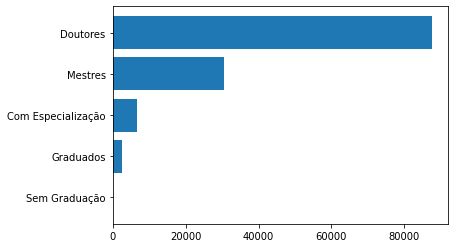

In [98]:
docentes_publi = df.loc[df['TP_CATEGORIA_ADMINISTRATIVA'] == (1 or 2 or 3)]
# docentes_part = df.loc[df['TP_CATEGORIA_ADMINISTRATIVA'] == (4 or 5)].count()[0]

sem_grad = docentes_publi.loc[docentes_publi['TP_ESCOLARIDADE'] == 1].count()[0]
graduados = docentes_publi.loc[docentes_publi['TP_ESCOLARIDADE'] == 2].count()[0]
especializados = docentes_publi.loc[docentes_publi['TP_ESCOLARIDADE'] == 3].count()[0]
mestres = docentes_publi.loc[docentes_publi['TP_ESCOLARIDADE'] == 4].count()[0]
doutores = docentes_publi.loc[docentes_publi['TP_ESCOLARIDADE'] == 5].count()[0]

x_axis = ['Sem Graduação', 'Graduados', 'Com Especialização', 'Mestres', 'Doutores']
y_axis = [sem_grad, graduados, especializados, mestres, doutores]

plt.barh(x_axis, y_axis)

plt.show()

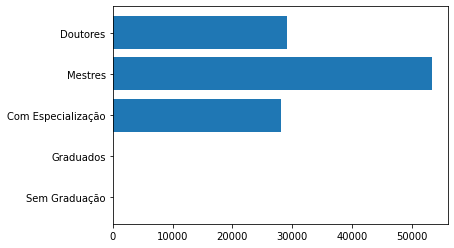

In [97]:
docentes_part = df.loc[df['TP_CATEGORIA_ADMINISTRATIVA'] == (4 or 5)]

sem_grad = docentes_part.loc[docentes_part['TP_ESCOLARIDADE'] == 1].count()[0]
graduados = docentes_part.loc[docentes_part['TP_ESCOLARIDADE'] == 2].count()[0]
especializados = docentes_part.loc[docentes_part['TP_ESCOLARIDADE'] == 3].count()[0]
mestres = docentes_part.loc[docentes_part['TP_ESCOLARIDADE'] == 4].count()[0]
doutores = docentes_part.loc[docentes_part['TP_ESCOLARIDADE'] == 5].count()[0]

x_axis = ['Sem Graduação', 'Graduados', 'Com Especialização', 'Mestres', 'Doutores']
y_axis = [sem_grad, graduados, especializados, mestres, doutores]

plt.barh(x_axis, y_axis)

plt.show()

## É possível observar que há um percentual muito maior de docentes doutores em universidades públicas proporcionalmente.

### Para valores mais exatos, temos:
- Doutores em Instituições Públicas: **68,7%**
- Doutores em Instituições Particulares: **26,3%**
-----------------
- Mestres em Instituições Públicas: **23,9%**
- Mestres em Instituições Particulares: **48,2%**
-----------------
- Com Especialização em Instituições Públicas: **5,3%**
- Com Especialização em Instituições Privadas: **25,4%**